## Implement pricing, Monte Carlo estimation, and delta-hedging of a quadratic option

Proj Authors: Kenny & Joseph

## Problem 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.stats import norm

## Params
S0 = 15
K = 14
r = 0.02
   
sigma = 0.10
T = 1.5


# Computing $V_0=v(0,S_0$)
## A confirmation for our manual compute for 2.1

In [3]:
# v_t 
def quad_price(S, t):
    tau = T - t
    term1 = (S**2) * np.exp((r + sigma**2) * tau)
    term2 = -2 * K * S
    term3 = (K**2) * np.exp(-r * tau)
    return term1 + term2 + term3
V_0 = quad_price(15,0)

print(f"The price of the derivative product at t=0 is : {V_0:.2f} ")

The price of the derivative product at t=0 is : 5.56 


In [4]:
# delta
def quad_delta(S, t):
    tau = T - t
    return 2 * S * np.exp((r + sigma**2) * tau) - 2 * K

By using this Formula $$d_2 = \frac{1}{\sigma \sqrt(T)} \left(ln(\frac{S_0}{K})+(r-\sigma^2)T \right), d_1 = \sigma \sqrt(T)+d_2$$

Quadratic Option Price (V0): $5.5636
European Call Price (C0):    $1.6207


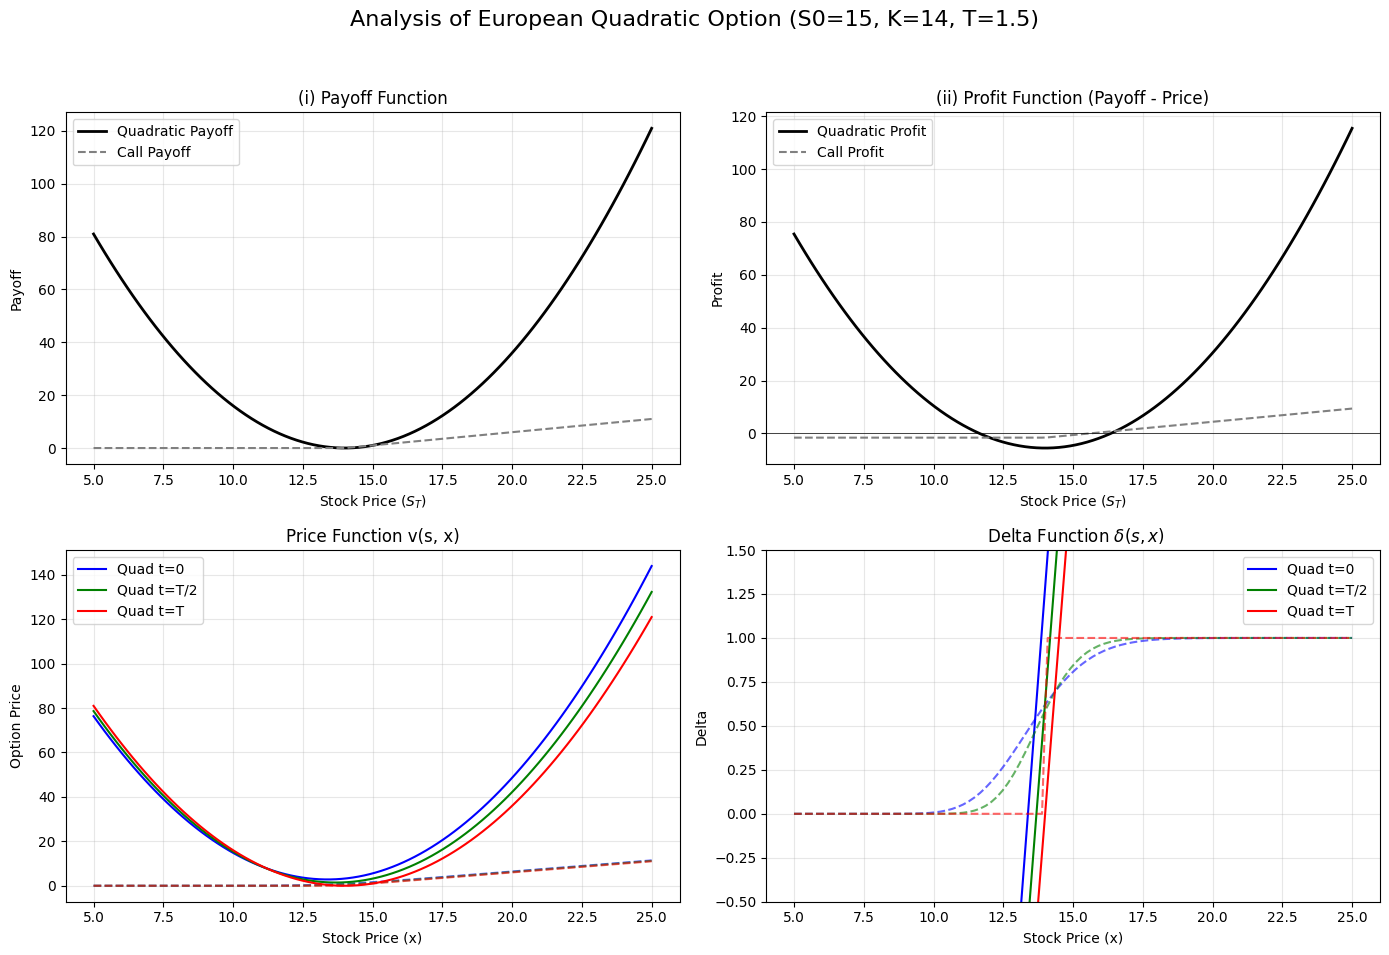

In [5]:
 
def call_price(S, t):
    tau = T - t
    # if tau == 0:
    #     return np.maximum(S - K, 0)
    
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d1 = d2 + sigma * np.sqrt(tau)
    return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

def call_delta(S, t):
    tau = T - t
    if tau == 0:
        return np.where(S > K, 1.0, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    return norm.cdf(d1)

# Calc V0 
V0 = quad_price(S0, 0)
C0 = call_price(S0, 0)
print(f"Quadratic Option Price (V0): ${V0:.4f}")
print(f"European Call Price (C0):    ${C0:.4f}")

# Setup Plots 
x = np.linspace(5, 25, 100)
times = [0, T/2, T]
colors = ['blue', 'green', 'red']
labels = ['t=0', 't=T/2', 't=T']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Analysis of European Quadratic Option (S0={S0}, K={K}, T={T})', fontsize=16)

# Payoff  at t=T
payoff_quad = (x - K)**2
payoff_call = np.maximum(x - K, 0)

axs[0, 0].plot(x, payoff_quad, label='Quadratic Payoff', color='black', linewidth=2)
axs[0, 0].plot(x, payoff_call, label='Call Payoff', color='gray', linestyle='--')
axs[0, 0].set_title('(i) Payoff Function')
axs[0, 0].set_xlabel('Stock Price ($S_T$)')
axs[0, 0].set_ylabel('Payoff')
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].legend()

# Payoff - V0  
profit_quad = payoff_quad - V0
profit_call = payoff_call - C0

axs[0, 1].plot(x, profit_quad, label='Quadratic Profit', color='black', linewidth=2)
axs[0, 1].plot(x, profit_call, label='Call Profit', color='gray', linestyle='--')
axs[0, 1].axhline(0, color='black', linewidth=0.5) # Zero line
axs[0, 1].set_title('(ii) Profit Function (Payoff - Price)')
axs[0, 1].set_xlabel('Stock Price ($S_T$)')
axs[0, 1].set_ylabel('Profit')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].legend()

# Price Function v(s, x)
for t, col, lab in zip(times, colors, labels):
    # Quadratic
    p_quad = [quad_price(si, t) for si in x]
    axs[1, 0].plot(x, p_quad, label=f'Quad {lab}', color=col)
    
    # Call-Dashed
    if t == T: 
        p_call = np.maximum(x - K, 0)  
    else:
        p_call = [call_price(si, t) for si in x]
    axs[1, 0].plot(x, p_call, linestyle='--', color=col, alpha=0.6)

axs[1, 0].set_title('Price Function v(s, x)')
axs[1, 0].set_xlabel('Stock Price (x)')
axs[1, 0].set_ylabel('Option Price')
axs[1, 0].grid(True, alpha=0.3)
axs[1, 0].legend()

# delta(s, x)
for t, col, lab in zip(times, colors, labels):
    # # Quadratic
    d_quad = [quad_delta(si, t) for si in x]
    axs[1, 1].plot(x, d_quad, label=f'Quad {lab}', color=col)
    
    # Call (Dashed)
    d_call = [call_delta(si, t) for si in x]
    axs[1, 1].plot(x, d_call, linestyle='--', color=col, alpha=0.6)

axs[1, 1].set_title(r' Delta Function $\delta(s, x)$')
axs[1, 1].set_xlabel('Stock Price (x)')
axs[1, 1].set_ylabel('Delta')
axs[1, 1].grid(True, alpha=0.3)
axs[1,1].set_ylim(-0.5,1.5)
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('output1.png')
plt.show()

## Problem 3

## Payoff function

In [6]:
def psi(x):
    return (x-K)**2

## Monte Carlo

In [7]:
def monte_carlo(psi,S_0,T,r,sigma,M):
    Z = np.random.normal(0,1,M)
    S_T = S_0 * np.exp((r-(sigma**2)/2)*T+(sigma*np.sqrt(T)*Z))
    payoff = psi(S_T)
    return np.exp(-r*T)*np.mean(payoff)

In [8]:
monte_carlo(psi,S_0=15,T=1.5,r=0.02,sigma=0.1,M=1000)

np.float64(5.508400221336227)

## Computing N sample of Monte Carlo estimation with `M=1000`

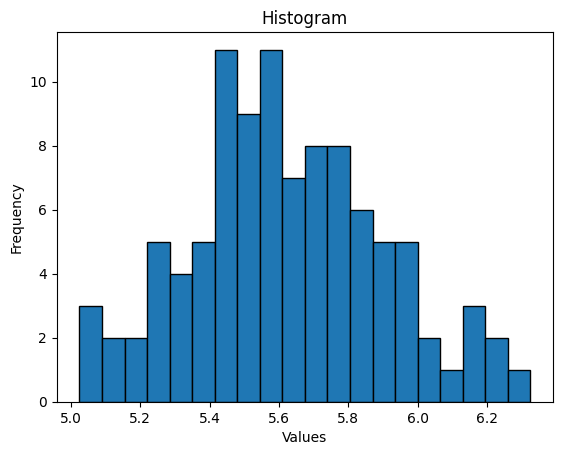

In [9]:
v_hat = []
for i in range (100):
    v_0 = monte_carlo(psi,S_0=15,T=1.5,r=0.02,sigma=0.1,M=1000)
    v_hat.append(v_0)
    
plt.hist(v_hat, bins=20, edgecolor='black')  


plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequency")


plt.show()

## Computing N sample of Monte Carlo estimation with `M=100000`

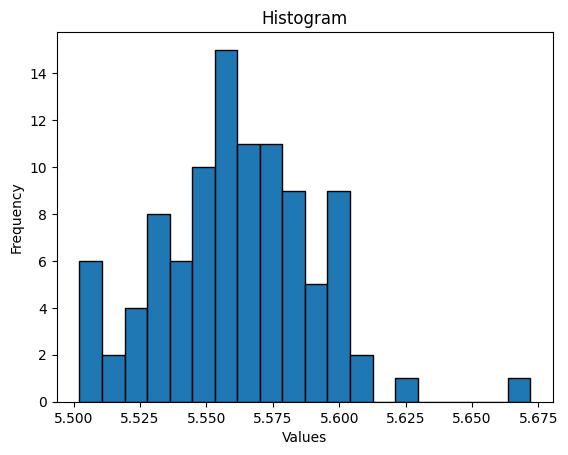

In [10]:
v_hat_1 = []
for i in range (100):
    v_0 = monte_carlo(psi,S_0=15,T=1.5,r=0.02,sigma=0.1,M=100000)
    v_hat_1.append(v_0)
    
plt.hist(v_hat_1, bins=20, edgecolor='black')  


plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequency")


plt.show()

### Insights...  
<b> We can se that we M increase, the distribution is more and more arround the real value of $V_0$, the variance arround the mean $V_0$ become smaller

## Problem 3-2-(a)  Dynamic of replication strategy

### The formula for portfolio at $k$ : $\Pi_k=(\Pi_{k-1}-\Delta_{k-1}S_{k-s})e^{r\delta t}+\Delta_{k-1}S_k$ 

In [11]:
v_0    = 5.56359305
T      = 1.5
mu     = 0.05
K      = 14
delta_t = 0.01
r      = 0.02
S_0    = 15
sigma  = 0.1

def v(t, x):
    return x**2 * np.exp((T - t)*(r + sigma**2)) - 2*K*x + K**2 * np.exp(-r*(T - t))

def Delta(t, x):
    return 2*x*np.exp((r + sigma**2)*(T - t)) - 2*K

def simulate_one_path():
    N_t = int(T / delta_t)
    t_grid = np.linspace(0, T, N_t + 1)

    # Brownian
    W = [0.0]
    for i in range(1, N_t + 1):
        Z = np.random.normal(0, 1)
        w = W[i-1] + np.sqrt(delta_t) * Z
        W.append(w)

    # S_t
    S_t = []
    for i in range(len(W)):
        t = t_grid[i]
        s_t = S_0 * np.exp((mu - 0.5*sigma**2)*t + sigma*W[i])
        S_t.append(s_t)

    # Delta(t, S_t)
    delta_list = []
    for i in range(len(t_grid)):
        delta_i = Delta(t_grid[i], S_t[i])
        delta_list.append(delta_i)

    # v(t, S_t)
    v_list = []
    for i in range(len(t_grid)):
        v_ = v(t_grid[i], S_t[i])
        v_list.append(v_)

    # Portfolio Π_k
    portfolio = [v_0]
    for k in range(1, len(S_t)):
        portfolio_k = ((portfolio[k-1] - delta_list[k-1]*S_t[k-1]) * np.exp(r*delta_t) + delta_list[k-1] * S_t[k])
        portfolio.append(portfolio_k)

    return t_grid, np.array(S_t), np.array(delta_list), np.array(v_list), np.array(portfolio)


In [12]:
all_S = []
all_delta = []
all_v = []
all_portfolio = []


for k in range(5):
    t_grid, S_t, delta_list, v_list, portfolio = simulate_one_path()
    all_S.append(S_t)
    all_delta.append(delta_list)
    all_v.append(v_list)
    all_portfolio.append(portfolio)

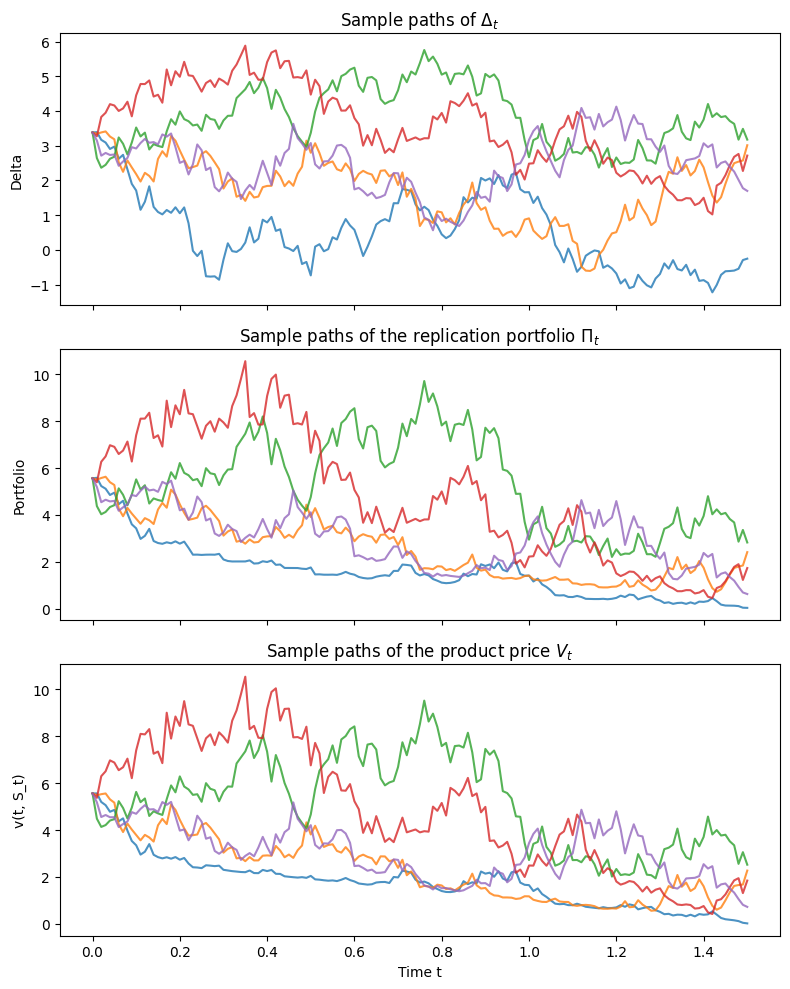

In [13]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 10))
axS, axD, axV = axes

for k in range(5):
    axS.plot(t_grid, all_delta[k], alpha=0.8)      
    axD.plot(t_grid, all_portfolio[k], alpha=0.8) 
    axV.plot(t_grid, all_v[k], alpha=0.8)      

axS.set_ylabel("Delta")
axS.set_title(r"Sample paths of $\Delta_t$")

axD.set_ylabel("Portfolio")
axD.set_title(r"Sample paths of the replication portfolio $\Pi_t$")

axV.set_ylabel("v(t, S_t)")
axV.set_xlabel("Time t")
axV.set_title(r"Sample paths of the product price $V_t$")

plt.tight_layout()
plt.show()


# Comment :
For all five paths, the replication portfolio $\Pi_t$ and the product price $V_t = v(t, S_t)$ are essentially indistinguishable: their sample paths almost coincide. This illustrates that the dynamic delta-hedging strategy,
implemented with a small time step $\delta = 0.01$, replicates the product very accurately.

## Problem 3-2-(b) : Hedging error

In [14]:
v_0    = 5.56359305
T      = 1.5
mu     = 0.05
K      = 14
delta_t = 0.01
r      = 0.02
S_0    = 15
sigma  = 0.1

n_paths = 100 
errors = []
for k in range (n_paths):
    t_grid, S_t, delta_list, v_list, portfolio = simulate_one_path()
    S = S_t[-1]
    P = portfolio[-1]
    psi = (S-K)**2
    error =  P-psi
    errors.append(error)    

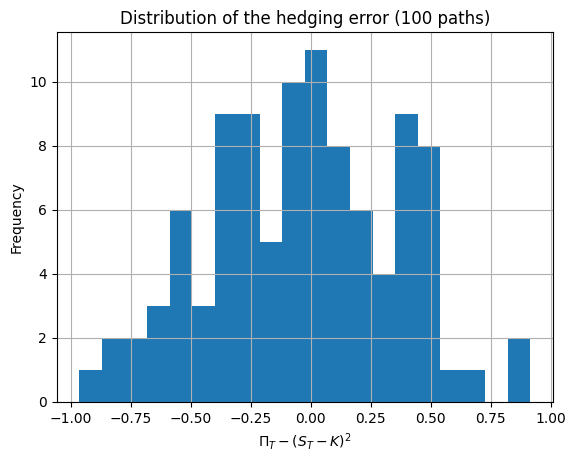

In [15]:
plt.hist(errors, bins=20)
plt.xlabel(r"$\Pi_T- (S_T - K)^2$")
plt.ylabel('Frequency')
plt.title("Distribution of the hedging error (100 paths)")
plt.grid(True)
plt.show()

In [16]:
print(f'Mean of errors:{np.mean(errors):.2f}')
print(f'Stdev of errors :{np.std(errors):.2f}')

Mean of errors:-0.03
Stdev of errors :0.39


### Comment  
<b> We can see that the errors are spread arround $0$, with positive and negative values, which means sometimes the portfolio greater than the payoff and sometimes it is less. The fact that the erros are distibuted arround 0 suggest that the strategy is unbiased on average.